In [ ]:
train_data_dir = '/content/drive/MyDrive/tubesML/dataset/train'
validation_data_dir = '/content/drive/MyDrive/tubesML/dataset/test'

In [ ]:
from tensorflow import keras

base_model = keras.applications.ResNet50(
    weights='imagenet',
    input_shape=(224,224,3),
    include_top=False
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(samplewise_center=False,
                             samplewise_std_normalization=False,
                             horizontal_flip = True,
                             vertical_flip = False,
                             height_shift_range = 0.15,
                             width_shift_range = 0.15,
                             rotation_range = 5,
                             shear_range = 0.01,
                             fill_mode = 'nearest',
                             zoom_range=0.01)

train_it = datagen.flow_from_directory(train_data_dir,
                                       target_size=(224,224),
                                       color_mode='rgb',
                                       class_mode="binary")

valid_it = datagen.flow_from_directory(validation_data_dir,
                                      target_size=(224,224),
                                      color_mode='rgb',
                                      class_mode="binary")

Found 279 images belonging to 2 classes.
Found 74 images belonging to 2 classes.


In [ ]:
inputs = keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)

#add pooling layer of flatten layer
x = keras.layers.GlobalAveragePooling2D()(x)

#add final dense layer
outputs = keras.layers.Dense(1, activation = 'sigmoid')(x)

#combine inputs and outputs to create model
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
base_model.trainable = False

#compile the model with a low learning rate
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
              loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23589761 (89.99 MB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
# Misalkan model adalah model Anda, train_data adalah dataset pelatihan, dan val_data adalah dataset validasi
history=model.fit(train_it, epochs=5, steps_per_epoch=10, validation_data=valid_it, validation_steps=10)


Epoch 1/5
 9/10 [==========================>...] - ETA: 0s - loss: 1.2567 - acc: 0.7455

10/10 [==============================] - 19s 1s/step - loss: 1.2567 - acc: 0.7455 - val_loss: 0.0749 - val_acc: 0.9865


In [ ]:
# Training the model (kode pelatihan Anda)
model.fit(train_it, epochs=5, validation_data=valid_it)

# Evaluating the model
evaluation_result = model.evaluate(valid_it)

# Displaying the evaluation result
print("Loss:", evaluation_result[0])
print("Accuracy:", evaluation_result[1])


Epoch 1/5
2/9 [=====>........................] - ETA: 6s - loss: 0.0484 - acc: 0.9818

KeyboardInterrupt: ignored

Epoch 1/5
9/9 [==============================] - 13s 1s/step - loss: 0.0468 - acc: 0.9821 - val_loss: 0.0546 - val_acc: 0.9730
Epoch 2/5
9/9 [==============================] - 12s 1s/step - loss: 0.1594 - acc: 0.9391 - val_loss: 0.8384 - val_acc: 0.8108
Epoch 3/5
9/9 [==============================] - 13s 1s/step - loss: 0.0832 - acc: 0.9821 - val_loss: 0.0531 - val_acc: 0.9595
Epoch 4/5
9/9 [==============================] - 13s 2s/step - loss: 0.0051 - acc: 1.0000 - val_loss: 0.0615 - val_acc: 0.9865
Epoch 5/5
9/9 [==============================] - 12s 1s/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.0205 - val_acc: 0.9865


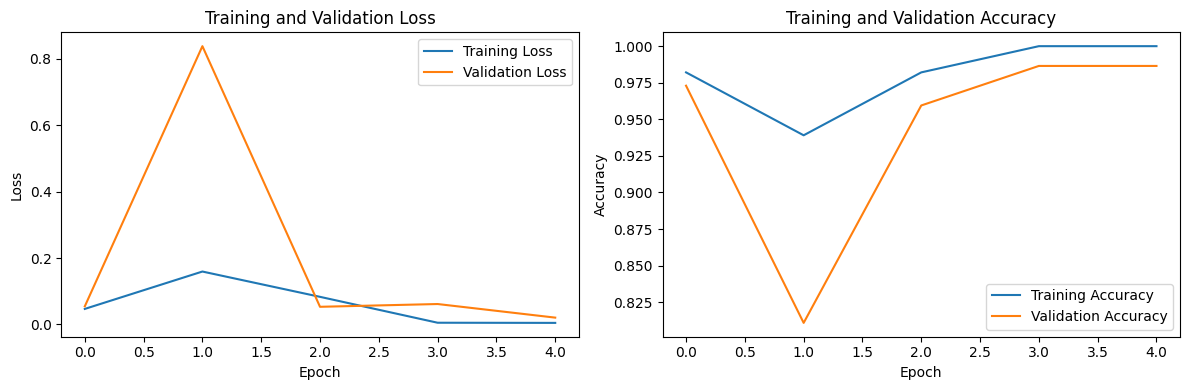

3/3 [==============================] - 2s 623ms/step - loss: 0.0379 - acc: 0.9730
Loss: 0.037867095321416855
Accuracy: 0.9729729890823364


In [ ]:
import matplotlib.pyplot as plt

# Training the model and storing the history
history = model.fit(train_it, epochs=5, validation_data=valid_it)

# Plotting the training and validation loss
plt.figure(figsize=(12, 4))

# Plotting training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Displaying the plots
plt.tight_layout()
plt.show()

# Evaluating the model
evaluation_result = model.evaluate(valid_it)

# Displaying the evaluation result
print("Loss:", evaluation_result[0])
print("Accuracy:", evaluation_result[1])


1/1 [==============================] - 0s 25ms/step


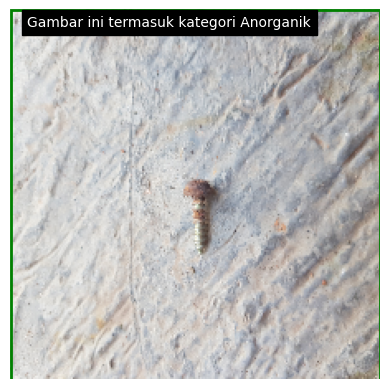

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load an image for testing
test_image_path = '/content/drive/MyDrive/tubesML/dataset/test/anorganik/00d2f741-anorganik_25.jpg'  # Ganti dengan path gambar uji Anda
img = image.load_img(test_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
#img_array /= 224.0  # Normalisasi gambar

# Predict
prediction = model.predict(img_array)

# Output hasil prediksi
if prediction[0][0] > 0.5:
    label = "Gambar ini termasuk kategori Organik"
else:
    label = "Gambar ini termasuk kategori Anorganik"

# Visualisasi hasil prediksi
plt.imshow(img)
plt.axis('off')

# Tambahkan kotak dan label
if prediction[0][0] > 0.5:
    rect = patches.Rectangle((0, 0), 224, 224, linewidth=2, edgecolor='r', facecolor='none', label='Anorganik')
else:
    rect = patches.Rectangle((0, 0), 224, 224, linewidth=2, edgecolor='g', facecolor='none', label='Organik')

plt.gca().add_patch(rect)
plt.text(10, 10, label, color='white', backgroundcolor='black')

plt.show()


1/1 [==============================] - 0s 25ms/step


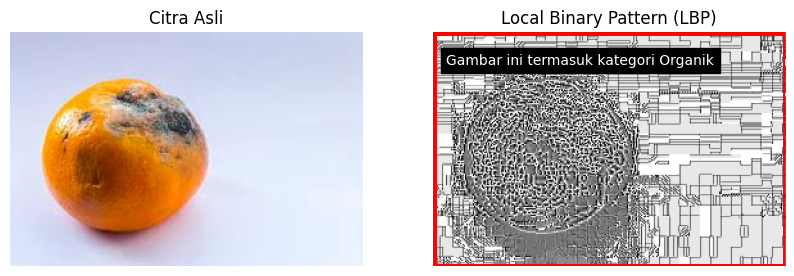

In [ ]:
from skimage import feature
from skimage import color
from skimage import io
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Fungsi untuk menghitung LBP pada citra
def compute_lbp(image):
    # Ubah citra ke skala abu-abu
    gray_image = color.rgb2gray(image)

    # Hitung LBP pada citra
    lbp = feature.local_binary_pattern(gray_image, P=10, R=1, method="uniform")

    return lbp

# Load an image for testing
test_image_path = '/content/drive/MyDrive/tubesML/dataset/test/organik/3c87191d-organik_8.jpg'  # Ganti dengan path gambar uji Anda
img = io.imread(test_image_path)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
# img_array /= 224.0  # Normalisasi gambar

# Compute LBP pada citra
lbp_image = compute_lbp(img)

# Predict
prediction = model.predict(img_array)



# Output hasil prediksi
if prediction[0][0] < 0.5:
    label = "Gambar ini termasuk kategori Anorganik"
else:
    label = "Gambar ini termasuk kategori Organik"

# Visualisasi hasil prediksi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(lbp_image, cmap='gray')
plt.title('Local Binary Pattern (LBP)')
plt.axis('off')

# Tambahkan kotak dan label
if prediction[0][0] < 0.5:
    rect = patches.Rectangle((0, 0), lbp_image.shape[1], lbp_image.shape[0], linewidth=5, edgecolor='g', facecolor='none', label='Anorganik')
else:
    rect = patches.Rectangle((0, 0), lbp_image.shape[1], lbp_image.shape[0], linewidth=5, edgecolor='r', facecolor='none', label='Organik')

plt.gca().add_patch(rect)

plt.text(10, 25, label, color='white', backgroundcolor='black')

plt.show()
